<a href="https://colab.research.google.com/github/noahgift/exploratory-data-analysis/blob/main/EDA_explorations_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest

This is a convenient location to collect data and store it for later use

In [15]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [9]:
from pathlib import Path
import spacy

In [53]:
#grab text
!rm *.txt
!wget https://raw.githubusercontent.com/noahgift/exploratory-data-analysis/main/Hemingway-old-man-see.txt
!wget https://raw.githubusercontent.com/noahgift/exploratory-data-analysis/main/hemingway-sun-also-rises.txt
!wget https://raw.githubusercontent.com/noahgift/exploratory-data-analysis/main/ansel_adams_wikipedia.txt

--2021-02-20 12:05:52--  https://raw.githubusercontent.com/noahgift/exploratory-data-analysis/main/Hemingway-old-man-see.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134520 (131K) [text/plain]
Saving to: ‘Hemingway-old-man-see.txt’

Hemingway-old-man-s 100%[===================>] 131.37K  --.-KB/s    in 0.008s  

2021-02-20 12:05:52 (16.3 MB/s) - ‘Hemingway-old-man-see.txt’ saved [134520/134520]

--2021-02-20 12:05:52--  https://raw.githubusercontent.com/noahgift/exploratory-data-analysis/main/hemingway-sun-also-rises.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP requ

In [54]:
oms_text = Path('Hemingway-old-man-see.txt').read_text()
sar_text = Path('hemingway-sun-also-rises.txt').read_text()
aa_text = Path('ansel_adams_wikipedia.txt').read_text()

## EDA

### Document Similarity

In [55]:
nlp = spacy.load("en_core_web_lg")

In [56]:
#how similar is old man and the see to the sun also rise?
oms_book = nlp(Path('Hemingway-old-man-see.txt').read_text())
sar_book = nlp(Path('hemingway-sun-also-rises.txt').read_text())
aa_bio = nlp(Path('ansel_adams_wikipedia.txt').read_text())

In [59]:
#both hemingway books are highly similar
oms_book.similarity(sar_book)

0.9886731764132038

In [61]:
#this book is less similar to a wikipedia article, but still similar why?
oms_book.similarity(aa_bio)

0.9125037891341127

### Word Visualizations

In [32]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
!python -m textblob.download_corpora

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [33]:
#remove stop words
from textblob import TextBlob
from nltk.corpus import stopwords

In [34]:
stop_words = stopwords.words('english')

In [62]:
oms_blob = TextBlob(Path('Hemingway-old-man-see.txt').read_text())

In [63]:
#without stop word removal
oms_count = oms_blob.word_counts.items()

In [64]:
len(oms_count)

2500

In [65]:
def remove_stop(words):
    no_stop = []
    for word in words:
        if word[0] not in stop_words:
            no_stop.append(word[0])
    return no_stop


In [66]:
no_stop_words = remove_stop(oms_count)

In [68]:
#the stop words are removed
len(no_stop_words)

2375

In [70]:
# A few words
no_stop_words[0:5]

['old', 'man', 'sea', 'fished', 'alone']

### Word cloud

In [83]:
from wordcloud import WordCloud

In [85]:
word_cloud_text = str1 = ' '.join(no_stop_words)
wordcloud = WordCloud().generate(word_cloud_text)

(-0.5, 399.5, 199.5, -0.5)

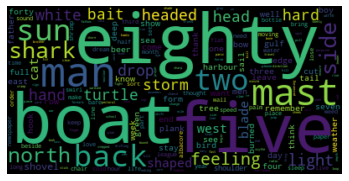

In [86]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Cloud-based NoCode-LowCode Tool

In [100]:
from pandas import DataFrame
df = DataFrame(no_stop_words, columns=["old-man-sea-words"])
df.head()

,old-man-sea-words
0,old
1,man
2,sea
3,fished
4,alone


In [102]:
df.to_csv("old-man-sea-words.txt",index=False)

### Plotly visualize

More work needs to be done

In [89]:
from plotly.offline import iplot
import plotly.graph_objs as go

In [90]:
fig = go.Figure(data=go.Bar(y=no_stop_words))
iplot(fig)